# Final Project 
### Anna Haynes
##### CSC 593: Programming for Scientists, Fall 2019

## Background

1. This dataset contains the records of all initial reports of incidents where the Boston Police Department was dispatched from 9/30/2018-9/29/2019 focused on capturing the type of incident as well as when and where it occurred. There was a more updated version but from 9/30/2019-Present, there was not a listing of the location of the crime which would not aid me in answering one of my questions. The dataset goes back to 2015 but from my purposes, I cut it down to one year to help with processing times as there are over 445,000 entires is the past 4 years. Important fields includes type of offense, when it was committed (date and time), which district it was in, if there was a shooting and the exact location of the crime.
2. This data is compiled by the Boston Polic Department and published by the Departmnet of Innovation and Technology on the Analyze Boton website at https://data.boston.gov/.
3. The incident reports are electronically recorded and compiled by the newest system used by the Bsoton Police Department. 

## Data Processing

Steps I needed to take to clean my data:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Importing my data to be read
bostoncrime = pd.read_excel('../dataset/crime1yr.xlsx', sheet_name=0)

# Dropping repetitive fields that were not helpful
bostoncrime = bostoncrime.drop(["YEAR", "MONTH", "HOUR","Location"], axis=1)

# Filling null values
bostoncrime = bostoncrime.fillna('N')

# Converting a date of str type to a datetime object
pd.to_datetime(bostoncrime.OCCURRED_ON_DATE)

# Making a column for each date category
bostoncrime['DATE'] = [d.date() for d in bostoncrime['OCCURRED_ON_DATE']]
bostoncrime['DAY'] = pd.DatetimeIndex(bostoncrime['DATE']).day
bostoncrime['MONTH'] = pd.DatetimeIndex(bostoncrime['DATE']).month
bostoncrime['YEAR'] = pd.DatetimeIndex(bostoncrime['DATE']).year
bostoncrime['ORDINAL_DAY'] = [d.toordinal() for d in bostoncrime['DATE']]
bostoncrime['TIME'] = [d.time() for d in bostoncrime['OCCURRED_ON_DATE']]
bostoncrime['HOUR'] = pd.to_datetime(bostoncrime['TIME'], format='%H:%M:%S').dt.hour

# Deleting the str type date/time column
bostoncrime = bostoncrime.drop(["OCCURRED_ON_DATE"], axis=1)

#Converting the Longitude and Latitude from str type to numerics
bostoncrime['Long'] = pd.to_numeric(bostoncrime['Long'],errors='coerce')
bostoncrime['Lat'] = pd.to_numeric(bostoncrime['Lat'],errors='coerce')

#There are random values of 1 or 0 that need to be removed (entire row)

# Get names of indexes for which column Lat has value less than 42
indexLat = bostoncrime[bostoncrime['Lat'] < 42].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexLat, inplace=True)

# Get names of indexes for which column Long has value greater -70
# Most of these already deleted from the previous code block, used as a double check
indexLong = bostoncrime[bostoncrime['Long'] > -70].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexLong, inplace=True)

# Get names of indexes for which column DISTRICT has value of N
indexDISTRICT = bostoncrime[bostoncrime['DISTRICT'] == 'N'].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexDISTRICT, inplace=True)

#save cleaned file
bostoncrime.to_excel('../dataset/cleanBostonCrime.xlsx')

A preview of what the data looks like now:

In [2]:
bostoncrime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DATE,DAY,MONTH,YEAR,ORDINAL_DAY,TIME,HOUR
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330,N,Monday,Part One,NORMANDY ST,42.306072,-71.082733,2018-09-03,3,9,2018,736940,21:25:00,21
1,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,Monday,Part Three,NEWCOMB ST,42.334182,-71.078664,2018-09-03,3,9,2018,736940,21:16:00,21
2,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,N,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,2018-09-03,3,9,2018,736940,21:09:00,21
3,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,Monday,Part Three,DELHI ST,42.275365,-71.090361,2018-09-03,3,9,2018,736940,21:05:00,21
4,I182070931,301,Robbery,ROBBERY - STREET,C6,177,N,Monday,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,2018-09-03,3,9,2018,736940,20:48:00,20


## Analysis

### Question 1. Is there any effect of time of year, week or day on when crimes are committed?
I want to investigate if there is a trend in when crimes are committed based on the time of year, week, and day, specifically when crime is highest.

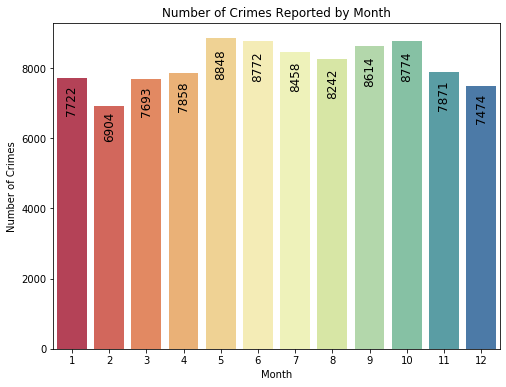

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to add value labels to the bar from ShikharDua at 
# https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
# Not all the labels are perfect but they get the point across
def show_values_on_bars(plot, textsize):
    for i, bar in enumerate(plot.patches):
        h = bar.get_height()
        plot.text(
            i, # bar index (x coordinate of text)
            h-(h/12), # y coordinate of text
            '{}'.format(int(h)),  # y label
            ha='center', 
            va='center', 
            size=textsize,
            rotation=90)

# Set up to plot the number of crimes versus the different time variables in the data (month, day of week, hour of day)

plt.figure(figsize=(8,6))
crimeMonth = sns.countplot(x="MONTH", palette='Spectral',data=bostoncrime)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Reported by Month')
show_values_on_bars(crimeMonth,12)
plt.show()

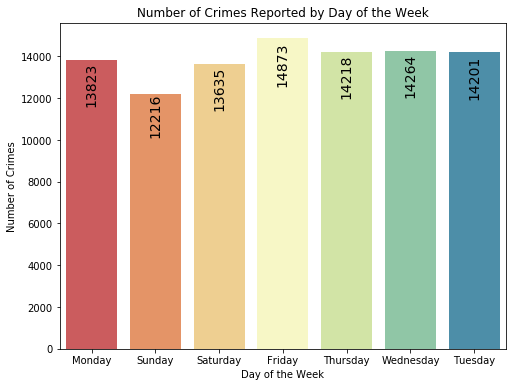

In [55]:
plt.figure(figsize=(8,6))
crimeWeekday = sns.countplot(x="DAY_OF_WEEK", palette='Spectral', data=bostoncrime)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Reported by Day of the Week')
show_values_on_bars(crimeWeekday,14)
plt.show()

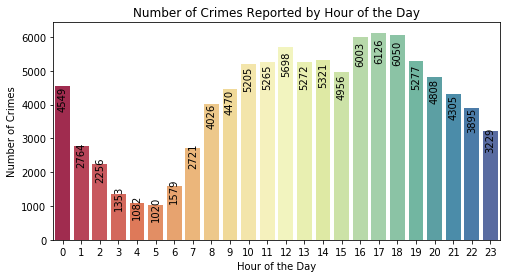

In [59]:
plt.figure(figsize=(8,4))
crimeHourly = sns.countplot(x="HOUR", palette='Spectral',data=bostoncrime)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Reported by Hour of the Day')
show_values_on_bars(crimeHourly,10)
plt.show()

The month with the highest crime rate is May. Friday is the day of the week when the most crimes are reported. The peak of crime during teh day is between 16:00-18:00 or 4-6pm. Next, I want to analyze what type of crime is most prominent during these times.

### Question 2. What types of crimes are being committed at these peak times in the year, week and day?

I want to find out what the Top 3 crimes that are being committed during these peak times. First, I plot the different time variables versus the different types of crime to see which type of crime is committed the most. Because I am concerned with specifically crime only, I am ruling out incident reports that deal with motor vehicle accident response, medical assistance, investigate property/person, verbal disputes, towed and the 'other" category. Each of these groups also has a description of the specifics which I will look at as well.

##### Crime by Month

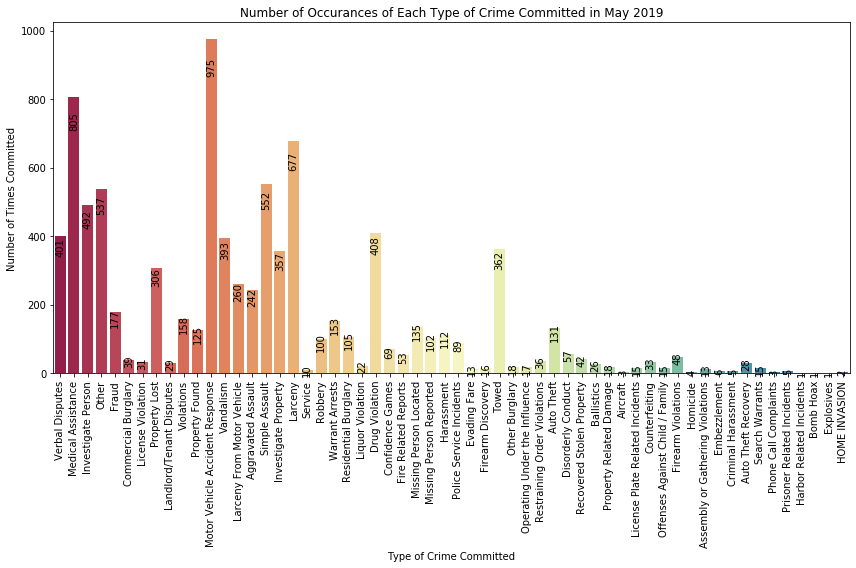

In [57]:
# Create a dataframe with only entries that contain May and then sort from high to low occurances of each crime
bostoncrimeMay = bostoncrime[bostoncrime.MONTH == 5]

# Plot May data with respect to offense code group (type of crime)
plt.figure(figsize=(12,8))
maycrime = sns.countplot(x="OFFENSE_CODE_GROUP", palette='Spectral', data=bostoncrimeMay)
plt.xlabel('Type of Crime Committed')
maycrime.set_xticklabels(maycrime.get_xticklabels(), rotation=90)
plt.ylabel('Number of Times Committed')
plt.title('Number of Occurances of Each Type of Crime Committed in May 2019')
plt.tight_layout()
show_values_on_bars(maycrime,10)
plt.show()

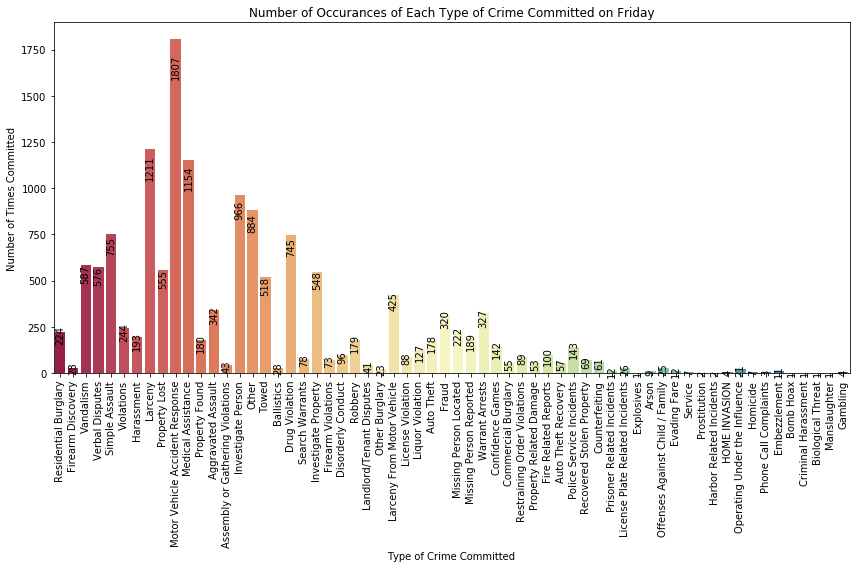

In [60]:
# Create a dataframe with only entries that contain Friday 
bostoncrimeFriday = bostoncrime[bostoncrime.DAY_OF_WEEK == 'Friday']

# Plot hour data with respect to offense code group (type of crime)
plt.figure(figsize=(12,8))
fridaycrime = sns.countplot(x="OFFENSE_CODE_GROUP", palette='Spectral', data=bostoncrimeFriday)
plt.xlabel('Type of Crime Committed')
fridaycrime.set_xticklabels(fridaycrime.get_xticklabels(), rotation=90)
plt.ylabel('Number of Times Committed')
plt.title('Number of Occurances of Each Type of Crime Committed on Friday')
plt.tight_layout()
show_values_on_bars(fridaycrime,10)
plt.show()

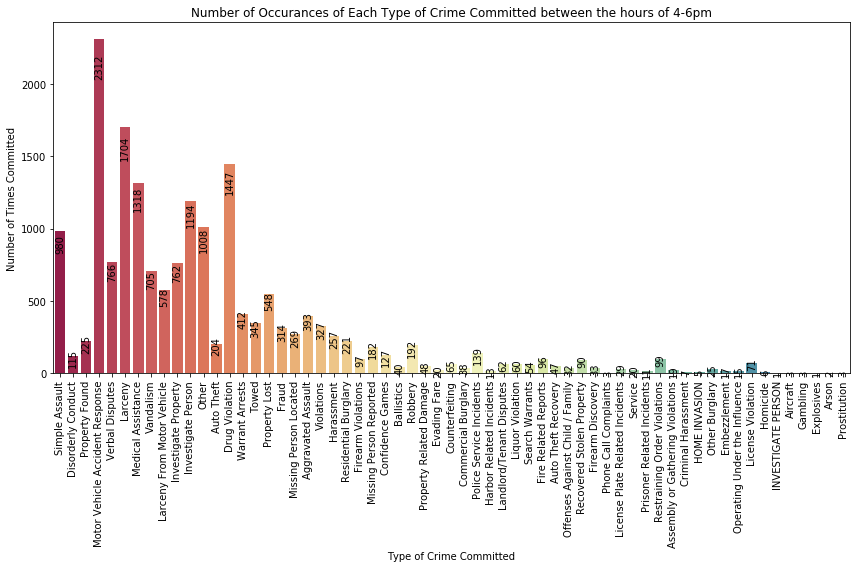

In [61]:
# Create a dataframe with only entries that contain 16, 17, and 18 hours
bostoncrime16 = bostoncrime[bostoncrime.HOUR == 16]
bostoncrime17 = bostoncrime[bostoncrime.HOUR == 17]
bostoncrime18 = bostoncrime[bostoncrime.HOUR == 18]
bostoncrime16_18 = bostoncrime16.append([bostoncrime17, bostoncrime18])

# Plot hour data with respect to offense code group (type of crime)
plt.figure(figsize=(12,8))
crime16_18 = sns.countplot(x="OFFENSE_CODE_GROUP", palette='Spectral',data=bostoncrime16_18)
plt.xlabel('Type of Crime Committed')
crime16_18.set_xticklabels(crime16_18.get_xticklabels(), rotation=90)
plt.ylabel('Number of Times Committed')
plt.title('Number of Occurances of Each Type of Crime Committed between the hours of 4-6pm')
plt.tight_layout()
show_values_on_bars(crime16_18,10)
plt.show()

If I exclude the categories previously mentioned, the Top 3 types of crime are:
    1. Larceny
    2. Drug Violation
    3. Simple Assault

##### Crime by Group
From here, I want to look at the occurance of the descriptions of each of these crimes. Because assault only has three categories, I will only be looking at larceny and drug violation.

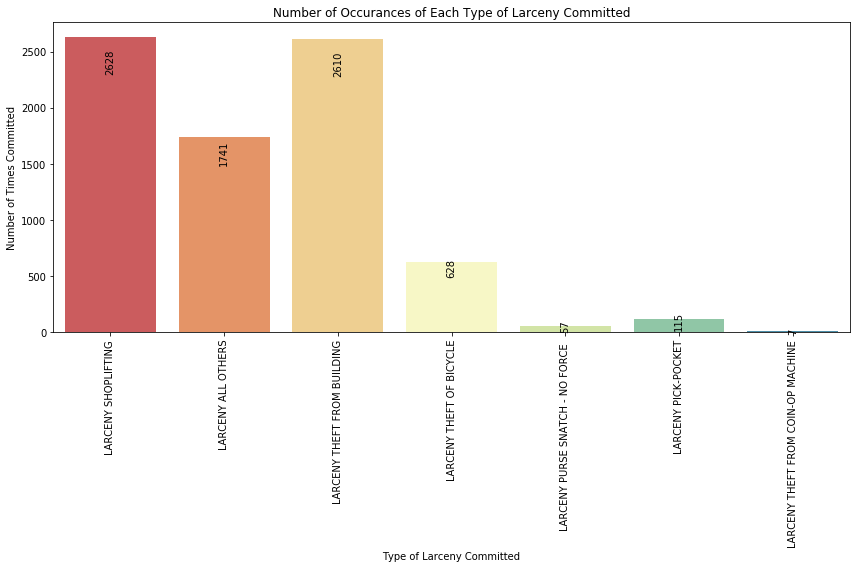

In [70]:
# Create a dataframe with just larceny charges
bostoncrimeLarceny = bostoncrime[bostoncrime.OFFENSE_CODE_GROUP == 'Larceny']

# Use the information from the dataframe to create a bar chart to visualize

plt.figure(figsize=(12,8))
crimeLarceny = sns.countplot(x="OFFENSE_DESCRIPTION", palette="Spectral", data=bostoncrimeLarceny)
plt.xlabel('Type of Larceny Committed')
crimeLarceny.set_xticklabels(crimeLarceny.get_xticklabels(), rotation=90)
plt.ylabel('Number of Times Committed')
plt.title('Number of Occurances of Each Type of Larceny Committed')
plt.tight_layout()
show_values_on_bars(crimeLarceny,10)
plt.show()

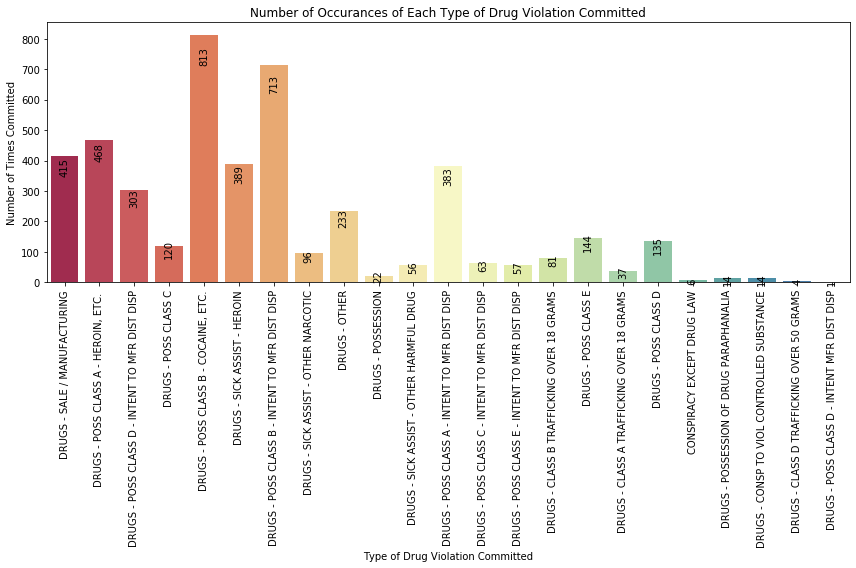

In [75]:
# Create a dataframe with just Drug Violation charges
bostoncrimeDrug = bostoncrime[bostoncrime.OFFENSE_CODE_GROUP == 'Drug Violation']

# Use the information from the dataframe to create a bar chart to visualize

plt.figure(figsize=(12,8))
crimeDrug = sns.countplot(x="OFFENSE_DESCRIPTION", palette="Spectral", data=bostoncrimeDrug)
plt.xlabel('Type of Drug Violation Committed')
crimeDrug.set_xticklabels(crimeDrug.get_xticklabels(), rotation=90)
plt.ylabel('Number of Times Committed')
plt.title('Number of Occurances of Each Type of Drug Violation Committed')
plt.tight_layout()
show_values_on_bars(crimeDrug,10)
plt.show()

### Question 3. Where does the most of these crimes happen during these peak times?